In [4]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [8]:
# Importing the dataset
data = pd.read_csv('bdata.csv')
print(data.columns)
print("dimension of data: {}".format(data.shape))
data.info()
data.head()

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'diagnosis'],
      dtype='object')
dimension of data: (569, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      569 non-null    int64  
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   perimeter_mean          569 non-null    float64
 4   area_mean               569 non-null    float64
 5   smoothness_mean         569 non-null    

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,1


In [19]:
# Getting the values and plotting it
data.columns
f1 = data['diagnosis'].values
f2 = data['radius_mean'].values
f3 = data['texture_mean'].values
f4 = data['perimeter_mean'].values
f5 = data['area_mean'].values
f6 = data['smoothness_mean'].values
f7 = data['compactness_mean'].values
f8 = data['concavity_mean'].values
f9 = data['concave points_mean'].values
f10 = data['symmetry_mean'].values



X = np.array(list(zip(f1, f2, f3, f4)))




In [27]:
from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters=5)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_

labels = kmeans.labels_





In [28]:
# Comparing with scikit-learn centroids

print(centroids) # From sci-kit learn


      
      


[[1.52671756e-02 1.03106794e+01 1.77336641e+01 6.59558779e+01]
 [6.30252101e-01 1.53319328e+01 2.02155462e+01 1.00495042e+02]
 [1.00000000e+00 2.43320000e+01 2.22080000e+01 1.63593333e+02]
 [9.89361702e-01 1.92878723e+01 2.17730851e+01 1.27339362e+02]
 [1.28571429e-01 1.27866190e+01 1.84155238e+01 8.24164286e+01]]


coordinate: [  1.    17.99  10.38 122.8 ] label: 3
coordinate: [  1.    20.57  17.77 132.9 ] label: 3
coordinate: [  1.    19.69  21.25 130.  ] label: 3
coordinate: [ 1.   11.42 20.38 77.58] label: 4


IndexError: list index out of range

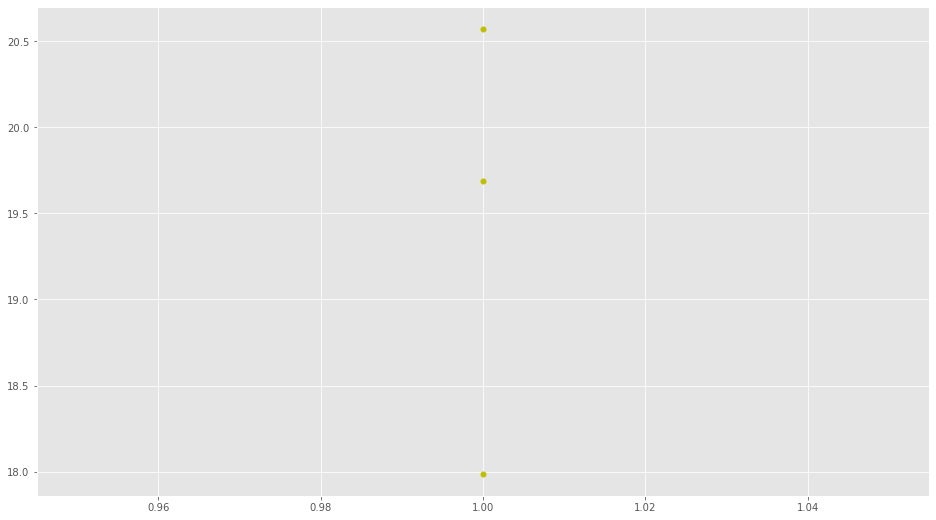

In [29]:
#print(labels)

colors = ["g.","r.","c.","y."]

for i in range(len(X)):
    print("coordinate:",X[i], "label:", labels[i])
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)


plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)

plt.show()

<AxesSubplot:>

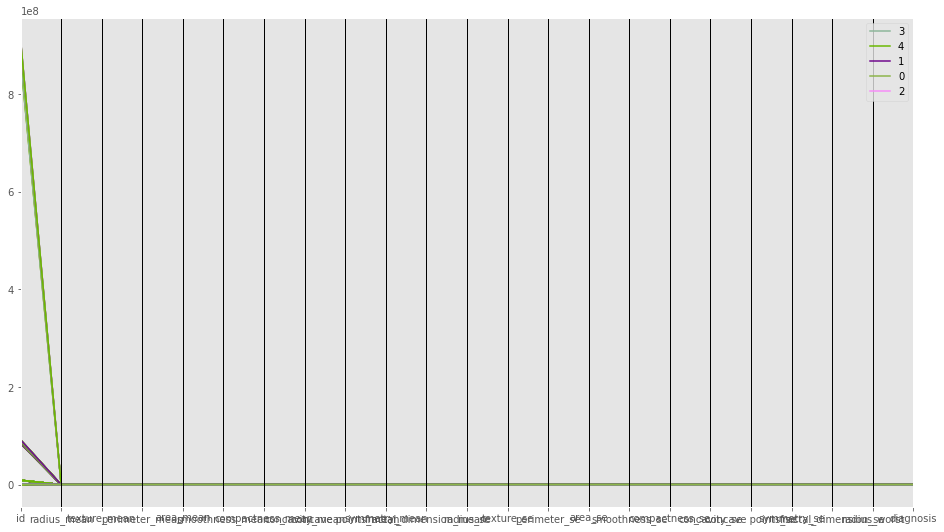

In [30]:
predict = kmeans.predict(X)
data['cluster'] = predict
pd.plotting.parallel_coordinates(data, 'cluster')